In [1]:
import time
import numpy as np
from plot_setup import *
import sounddevice as sd
import matplotlib.pylab as plt
from IPython.display import HTML
from matplotlib import animation
from continuously_signal import *

define_plots_settings()
%matplotlib inline

# Aquisição do sinal - Entrada

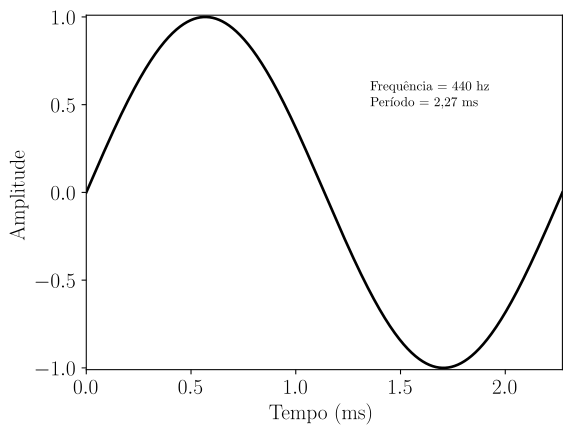

### Simulação do sinal contínuo
    cont_signal_freq - Frequência do sinal 
    time_sampling - Periodo em que o sinal foi amostrado
    cont_sampling_freq - Frequência do sinal amostrado

Text(0, 0.5, 'Amplitude')

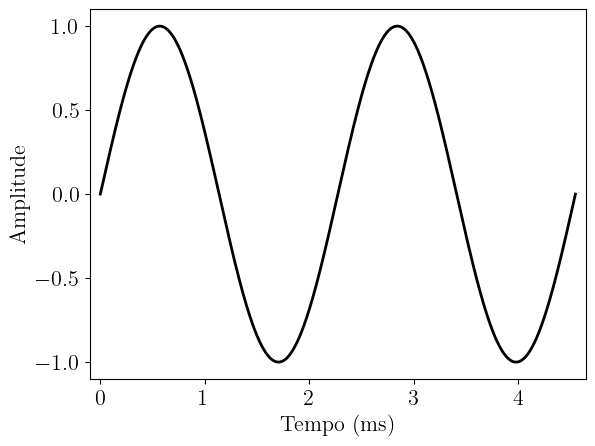

In [12]:
cont_signal_freq = [440]
time_sampling = 1/cont_signal_freq[0] * 2
cont_sampling_freq = 88000000 #88 Mhz
t_cont, signal_cont = signal_simulation(cont_signal_freq, cont_sampling_freq, time_sampling)
plt.plot(t_cont*1000, signal_cont,'k')
plt.xlabel("Tempo (ms)")
plt.axis([-0.1, t_cont.max()*1000+0.1, -1.1, 1.1])
plt.ylabel("Amplitude")

## Teorema de Shannon-Nyquist
A frequência de amostragem deve ser, no mínimo, maior que duas vezes a maior frequência do sinal de interesse

### Sinal Amostrado
    fc - Frequência da senóide
    sampling_freq - Frequência de amostragem
    time_sampling - Periodo em que o sinal foi amostrado


In [4]:
fc = [440]
sampling_freq = [880]
time_sampling = 1/fc[0] *2

1.5707963267948966
1.5707963267948966


Text(0, 0.5, 'Amplitude')

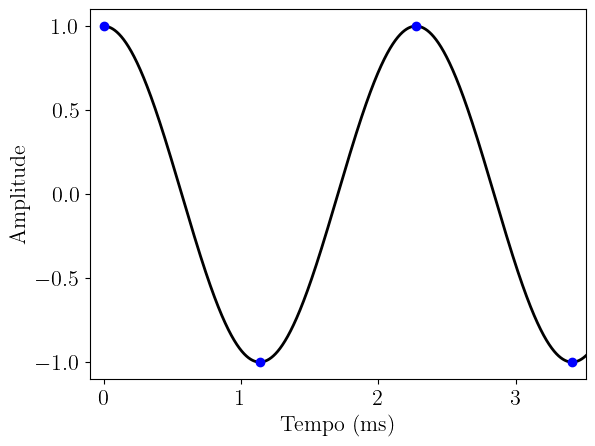

In [8]:
phase = 0
#phase = np.pi/2
#t_cont, signal_cont = signal_simulation(cont_signal_freq, cont_sampling_freq, time_sampling, phase)
t_samp, signal_samp = signal_simulation(fc, sampling_freq[0], time_sampling, phase )
plt.plot(t_cont*1000, signal_cont,'k')
plt.plot(t_samp*1000, signal_samp,'ob')
plt.xlabel("Tempo (ms)")
plt.axis([-0.1, t_samp.max()*1000+0.1, -1.1, 1.1])
plt.ylabel("Amplitude")

## Mudança na frequência de amostragem

In [8]:
def animate(fs):
    t_samp, signal_samp = signal_simulation(fc, fs, time_sampling)
    line1.set_data(t_samp*1000,signal_samp)
    return line1
def set_plot():
    f, axarr = plt.subplots(1,2,  sharey = True, figsize=(10,7),animated=True)
    line0, = axarr[0].plot([],[],'k')
    line1, = axarr[1].plot([],[],'ob')
    axarr[0].title.set_text("Sinal Contínuo")
    axarr[0].set_xlabel("Tempo (ms)")
    axarr[0].set_ylabel("Amplitude")
    axarr[0].set_xlim((0,2.3))
    axarr[0].set_ylim((-1.01,1.01))
    axarr[1].set_xlim((0,2.3))
    axarr[1].set_ylim((-1.01,1.01))
    axarr[1].title.set_text("Sinal Discreto")
    axarr[1].set_xlabel("Tempo (ms)")
    line0.set_data(t_cont*1000, signal_cont)
    return line0,line1,f

In [10]:
sampling_freq = np.arange(880,2000,30)
line0, line1, f = set_plot()
plt.close()
ani = matplotlib.animation.FuncAnimation(f, animate, frames=sampling_freq)
HTML(ani.to_jshtml())

## Frequência de amostragem fixa
    fs = 881 Hz
    fc = 440 Hz

Text(0.5, 0, 'Tempo (ms)')

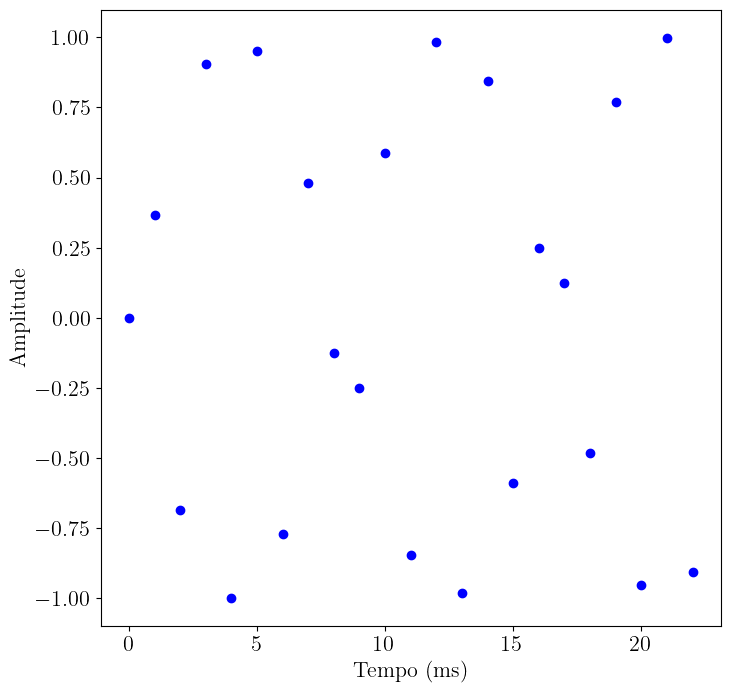

In [21]:
sampling_freq = 1000
fc = [440]
time_sampling = 1/fc[0]*10
t_samp, signal_samp = signal_simulation(fc, sampling_freq, time_sampling, phase = 0)
t_cont, signal_cont = signal_simulation(cont_signal_freq, cont_sampling_freq, time_sampling, phase = 0)
plt.figure(figsize = [8,8])
plt.plot(t_samp*1000, signal_samp,'ob')
#plt.plot(t_cont*1000,signal_cont,'k')
plt.ylabel("Amplitude")
plt.xlabel("Tempo (ms)")

O sinal está irreconhecível, baixa resolução

In [8]:
t_samp*sampling_freq


array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.759e+03, 1.760e+03,
       1.761e+03])

In [18]:
 n_samples = np.arange(0,881*time_sampling, 1)